In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings("ignore")


In [5]:
from google.colab import files
uploaded=files.upload()

Saving bank-full (1).csv to bank-full (1).csv


In [23]:
data=pd.read_csv("bank-full (1).csv", sep=";")

In [24]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [25]:
data.shape

(45211, 17)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [27]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [28]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


<Axes: xlabel='y', ylabel='count'>

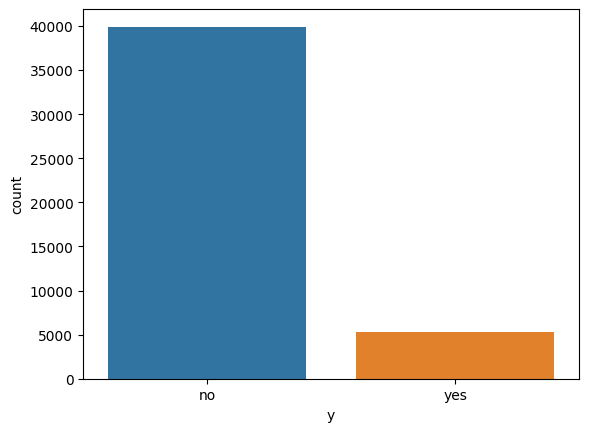

In [29]:
sns.countplot(x='y',data=data)

Text(0, 0.5, 'frequency of pruchase')

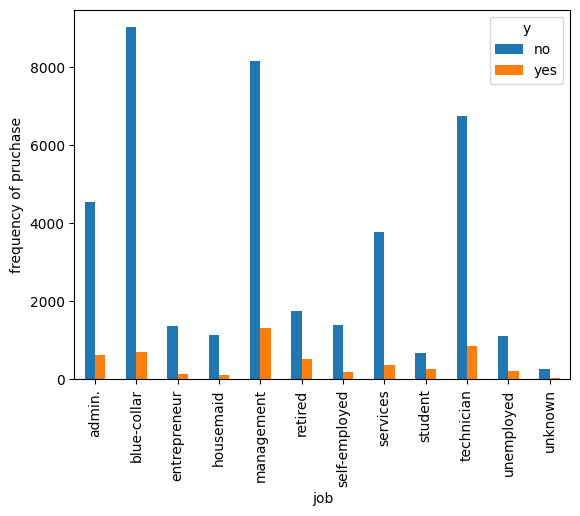

In [30]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.xlabel('job')
plt.ylabel('frequency of pruchase')

In [31]:
# all occupation hvd different types of subscription so it is important


<Axes: xlabel='marital'>

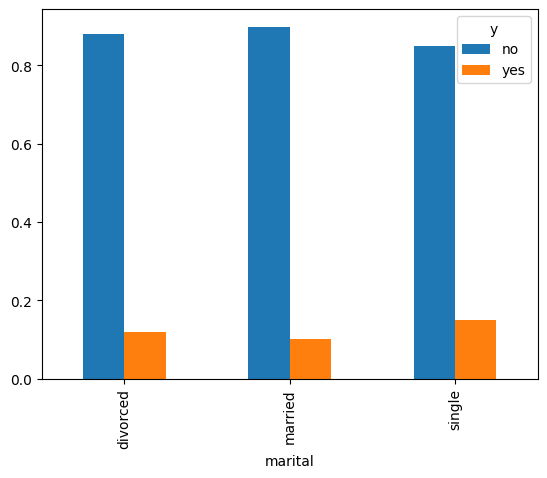

In [32]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked= False)

<Axes: xlabel='education'>

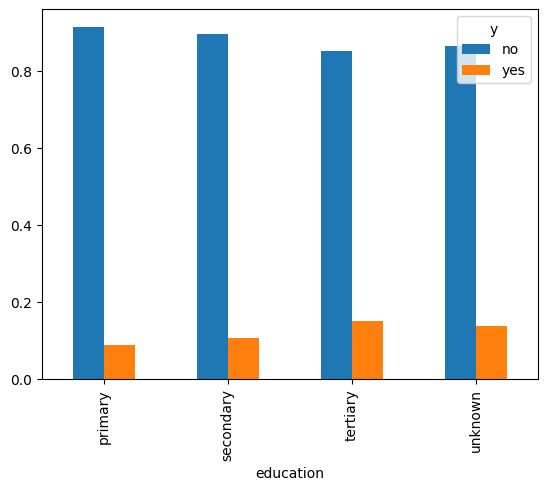

In [33]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar')

In [34]:
# AS THE  frequency is same , the education is not important


<Axes: title={'center': 'age'}, xlabel='y'>

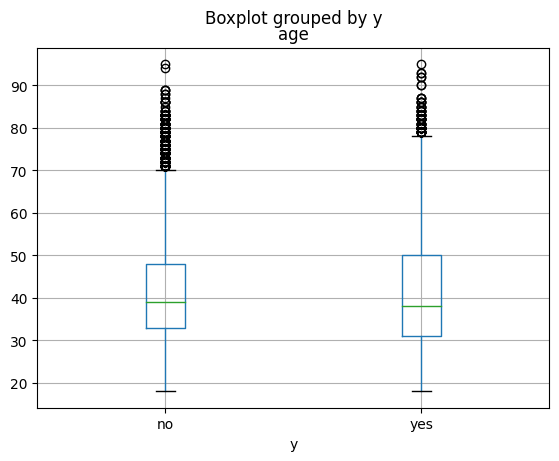

In [35]:
data.boxplot(column='age',by='y')

<Axes: xlabel='poutcome'>

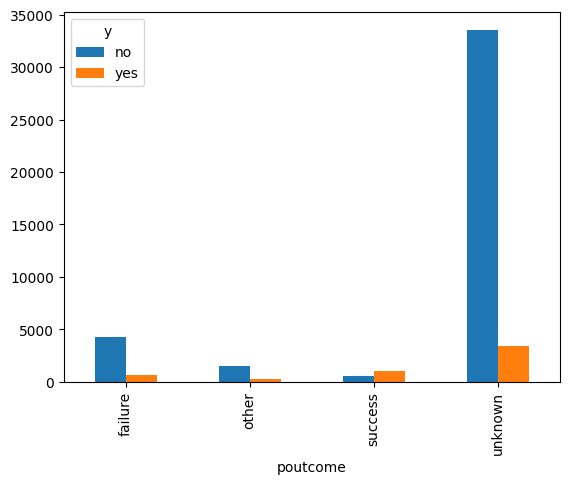

In [36]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')

In [37]:
#  "month","education","pdays","day","campaign","age","loan","housing","marital"
# these above columns are not important

data.drop(["month","education","pdays","day","campaign","age","loan","housing","marital"],axis=1,inplace=True)

In [38]:
data.head()

,job,default,balance,contact,duration,previous,poutcome,y
0,management,no,2143,unknown,261,0,unknown,no
1,technician,no,29,unknown,151,0,unknown,no
2,entrepreneur,no,2,unknown,76,0,unknown,no
3,blue-collar,no,1506,unknown,92,0,unknown,no
4,unknown,no,1,unknown,198,0,unknown,no


In [39]:
contact_d=pd.get_dummies(data['contact'],drop_first=True)
contact_d.columns


Index(['telephone', 'unknown'], dtype='object')

In [40]:
contact_d

,telephone,unknown
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
45206,0,0
45207,0,0
45208,0,0
45209,1,0


In [41]:
job_d=pd.get_dummies(data['job'],drop_first=True)
job_d.columns

Index(['blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown'],
      dtype='object')

In [42]:
job_d

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,1,0,0,0,0,0,0
45209,1,0,0,0,0,0,0,0,0,0,0


In [43]:
poutcome_d=pd.get_dummies(data['poutcome'],drop_first=True)
poutcome_d.columns

Index(['other', 'success', 'unknown'], dtype='object')

In [44]:
default_d=pd.get_dummies(data['default'],drop_first=True)
default_d.columns

Index(['yes'], dtype='object')

In [45]:
# Concate the dummy varibles
data = pd.concat([data,default_d,poutcome_d,job_d,contact_d],axis=1)
data.head(3)

,job,default,balance,contact,duration,previous,poutcome,y,yes,other,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,management,no,2143,unknown,261,0,unknown,no,0,0,...,1,0,0,0,0,0,0,0,0,1
1,technician,no,29,unknown,151,0,unknown,no,0,0,...,0,0,0,0,0,1,0,0,0,1
2,entrepreneur,no,2,unknown,76,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
data.drop(['default','poutcome','job','contact'],axis=1,inplace = True)
data.head()

,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,no,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,no,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,no,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,no,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,198,0,no,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [47]:
data.columns

Index(['balance', 'duration', 'previous', 'y', 'yes', 'other', 'success',
       'unknown', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown', 'telephone', 'unknown'],
      dtype='object')

In [48]:
## Map the output variable for converting categorical to numercal data & create new dataframe
data_new = data.copy()
data_new['y'] = data_new['y'].map({'no':0,'yes':1})
data_new.head(3)

,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [49]:
x=data.drop("y",axis=1)

In [50]:
y=data['y']

In [58]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [59]:
# Prediction probability of output
y_pred = classifier.predict(x)
y_pred_prob=classifier.predict_proba(x)
y_pred_prob

array([[0.97641671, 0.02358329],
       [0.98507704, 0.01492296],
       [0.99002687, 0.00997313],
       ...,
       [0.00853741, 0.99146259],
       [0.88227657, 0.11772343],
       [0.87911008, 0.12088992]])

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix = confusion_matrix(y,y_pred)
accuracy=accuracy_score(y,y_pred)
print(cm,    accuracy)

[[39005   917]
 [ 3605  1684]] 0.8999800933401163


In [61]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     39922
         yes       0.65      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.88     45211



In [55]:
## Accuray of model is 90% it is good model

In [64]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y= label_encoder.fit_transform(y)

In [65]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [68]:
from sklearn.metrics import roc_curve, auc

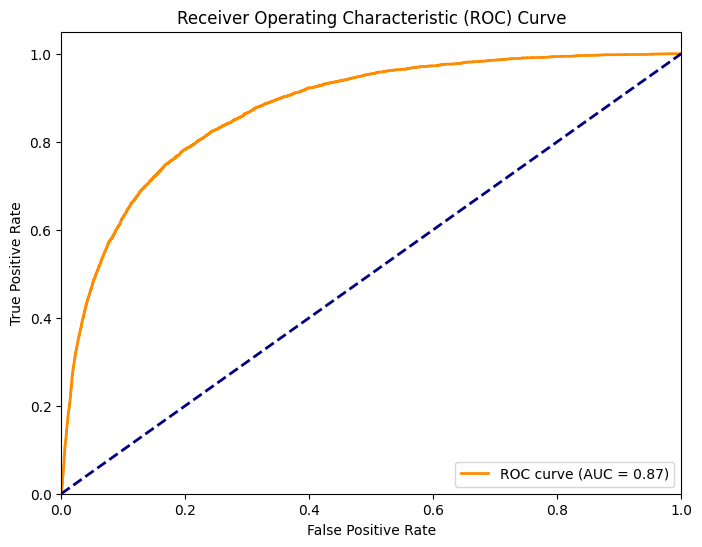

In [69]:
#ROC Curve
y_scores = classifier.predict_proba(x)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()